In [5]:
import os
os.environ['J_NOTEBOOK'] = '1'

from preprocess.preprocess import *
import PARAMETERS
import sys
sys.path.append('./preprocess/')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from confusion_matrix_pretty_print import print_confusion_matrix
from pathlib import Path

%matplotlib inline


PARAMETERS.PREPROCESS_OPTIMIZATION = True

PARAMETERS.LBP_METHOD = 'riu'
PARAMETERS.METHOD = 'get_pyramid_dataset'
PARAMETERS.INTERPOLATION_ALGORITHM = 'lanczos'
PARAMETERS.BALANCE = False
PARAMETERS.N_SCALES = 5
PARAMETERS.GRAY_INTENSITY = True
PARAMETERS.X2SCALE = True
PARAMETERS.FILE_EXTENSION = PARAMETERS.update_file_extension(PARAMETERS)
PARAMETERS.PLOT = False
PARAMETERS.DATASET = 'DRIVE'

pd.DataFrame({k: getattr(PARAMETERS, k) for k in VALID_PARAMETERS.keys()}, index=['Parameters']).head()

,LBP_METHOD,METHOD,INTERPOLATION_ALGORITHM,BALANCE,N_SCALES,GRAY_INTENSITY,X2SCALE
Parameters,riu,get_pyramid_dataset,lanczos,False,5,True,True


### Resultado CV

F1-score 0.685426

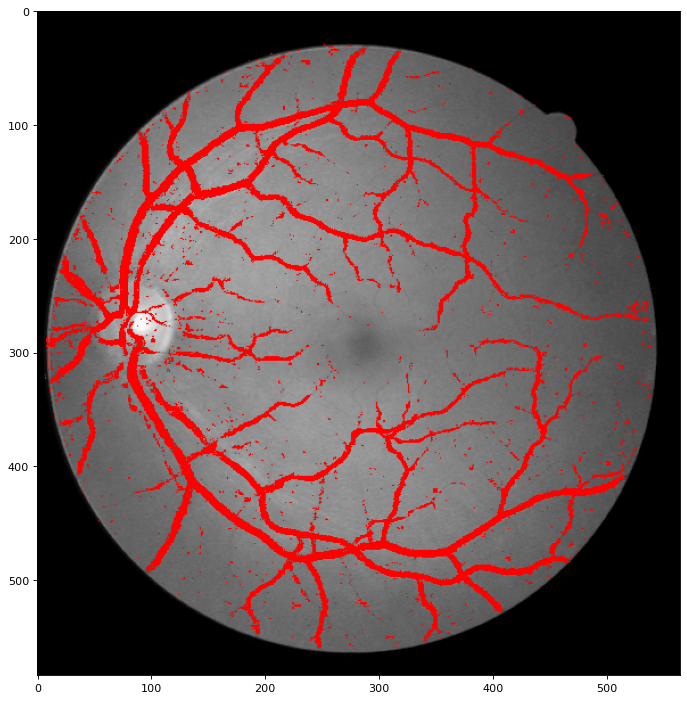

Accuracy score: 0.9292555186111174

F1 score: 0.7211952246541113

Confusion matrix:

     t/p      0     1 
        0 1141617 45928 
        1 50476 124686 
Sensivity: 0.7118324750802114
Specificity: 0.9613252550429668


(0.929, 0.721, 1141617, 45928, 50476, 124686)

In [6]:
from main import main
PARAMETERS.PLOT = True

main(lgb='Num', all_lbp=['riu', 'var'], plot_once=True, channels=(1, 2), recurrence=False)

In [7]:
import pandas as pd

df_train_riu = pd.read_pickle('../DB/DRIVE/extra_features/preprocess_optimization_lbp/train_train_riu_get_pyramid_dataset_lanczos_balance-False_scales-5_x2-True_gray-intensity-True.pkl', compression='gzip')
df_test_riu = pd.read_pickle('../DB/DRIVE/extra_features/preprocess_optimization_lbp/train_test_riu_get_pyramid_dataset_lanczos_balance-False_scales-5_x2-True_gray-intensity-True.pkl', compression='gzip')

df_train_riu.columns = [c + '_riu' if c not in ['Original', 'label'] else c for c in df_train_riu.columns]
df_test_riu.columns = [c + '_riu' if c not in ['Original', 'label'] else c for c in df_test_riu.columns]

y_train = df_train_riu['label']
y_test = df_test_riu['label']
df_train_riu = df_train_riu.drop(['label'], axis=1)
df_test_riu = df_test_riu.drop(['label'], axis=1)


df_train_var = pd.read_pickle('../DB/DRIVE/extra_features/preprocess_optimization_lbp/train_train_var_get_pyramid_dataset_lanczos_balance-False_scales-5_x2-True_gray-intensity-True.pkl', compression='gzip')
df_test_var = pd.read_pickle('../DB/DRIVE/extra_features/preprocess_optimization_lbp/train_test_var_get_pyramid_dataset_lanczos_balance-False_scales-5_x2-True_gray-intensity-True.pkl', compression='gzip')

df_train_var.columns = [c + '_var' if c not in ['Original', 'label'] else c for c in df_train_var.columns]
df_test_var.columns = [c + '_var' if c not in ['Original', 'label'] else c for c in df_test_var.columns]

df_train_var = df_train_var.drop(['Original', 'label'], axis=1)
df_test_var = df_test_var.drop(['Original', 'label'], axis=1)

df_train = pd.concat([df_train_riu, df_train_var], axis=1)
df_test = pd.concat([df_test_riu, df_test_var], axis=1)
display(df_train)
display(df_test)

,Original,1:1_riu,1:2_riu,1:4_riu,1:8_riu,2:1_1_riu,2:1_2_riu,2:1_3_riu,2:1_4_riu,1:1_var,1:2_var,1:4_var,1:8_var,2:1_1_var,2:1_2_var,2:1_3_var,2:1_4_var
0,2.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,1554.501957,3675.778309,2794.810984,2405.211703,58.0,128.0,147.0,40.0
1,3.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,4.0,1593.639472,3675.778309,2794.810984,2405.211703,171.0,176.0,179.0,106.0
2,3.0,4.0,8.0,8.0,8.0,16.0,16.0,16.0,8.0,1606.472711,3603.502715,2704.266626,2405.211703,133.0,109.0,98.0,111.0
3,3.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,4.0,1581.658943,3603.502715,2704.266626,2405.211703,97.0,97.0,136.0,170.0
4,3.0,8.0,4.0,8.0,8.0,8.0,8.0,8.0,8.0,1556.488075,3548.017615,2704.266626,2405.211703,104.0,129.0,221.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226537,2.0,8.0,8.0,16.0,8.0,8.0,16.0,8.0,16.0,1341.059792,1748.844025,1812.585001,1737.714011,8.0,76.0,163.0,115.0
226538,2.0,8.0,8.0,16.0,8.0,16.0,4.0,16.0,4.0,1413.240598,1748.844025,1812.585001,1737.714011,109.0,87.0,96.0,100.0
226539,2.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,1481.061918,1731.925784,1788.136112,1737.714011,49.0,56.0,120.0,112.0
226540,2.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,1513.548716,1731.925784,1788.136112,1737.714011,94.0,137.0,68.0,11.0


,Original,1:1_riu,1:2_riu,1:4_riu,1:8_riu,2:1_1_riu,2:1_2_riu,2:1_3_riu,2:1_4_riu,1:1_var,1:2_var,1:4_var,1:8_var,2:1_1_var,2:1_2_var,2:1_3_var,2:1_4_var
0,1.0,8.0,4.0,4.0,8.0,8.0,8.0,8.0,8.0,619.119314,1464.737902,2715.994439,2402.335307,45.0,93.0,225.0,27.0
1,1.0,8.0,4.0,4.0,8.0,8.0,4.0,8.0,4.0,669.681189,1464.737902,2715.994439,2402.335307,132.0,128.0,40.0,33.0
2,1.0,4.0,8.0,4.0,8.0,8.0,8.0,8.0,8.0,649.385330,1220.398868,2715.994439,2402.335307,105.0,76.0,22.0,240.0
3,1.0,8.0,8.0,4.0,8.0,8.0,8.0,16.0,8.0,556.544133,1220.398868,2715.994439,2402.335307,57.0,63.0,216.0,221.0
4,1.0,4.0,27.0,8.0,8.0,8.0,4.0,8.0,4.0,452.321295,1130.661310,2547.716765,2402.335307,60.0,67.0,165.0,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226969,1.0,8.0,8.0,8.0,8.0,8.0,8.0,16.0,16.0,414.180205,851.441780,1042.850153,772.490852,221.0,241.0,66.0,73.0
226970,1.0,8.0,8.0,8.0,8.0,8.0,16.0,16.0,16.0,437.408173,851.441780,1042.850153,772.490852,252.0,254.0,79.0,81.0
226971,1.0,4.0,8.0,4.0,4.0,8.0,16.0,8.0,4.0,445.180273,916.237195,1193.165336,789.555581,1.0,10.0,90.0,91.0
226972,1.0,8.0,8.0,4.0,4.0,8.0,8.0,8.0,8.0,421.618633,916.237195,1193.165336,789.555581,22.0,24.0,90.0,78.0


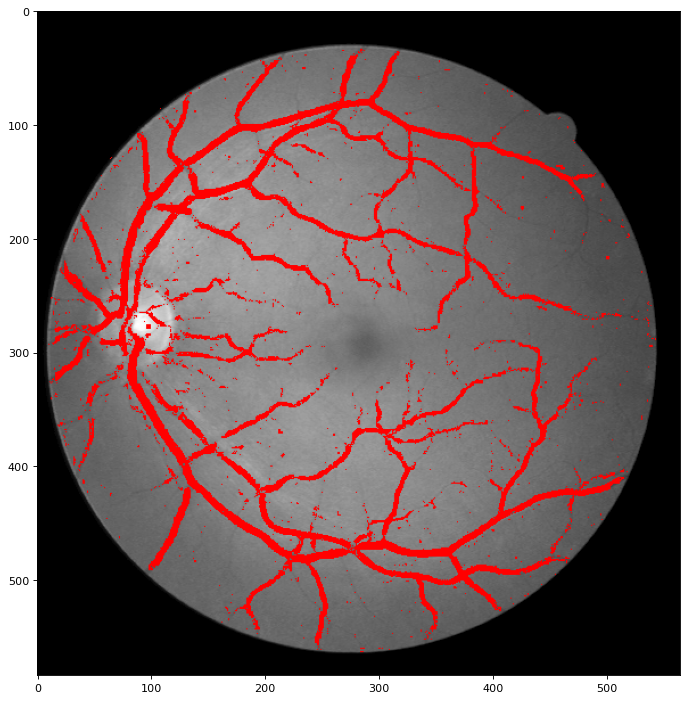

Accuracy score: 0.9280615715630727

F1 score: 0.7092595283782702

Confusion matrix:

     t/p    0.0   1.0 
      0.0 1145103 42442 
      1.0 55589 119573 
Sensivity: 0.6826423539352142
Specificity: 0.9642607227515589


(0.928, 0.709, 1145103, 42442, 55589, 119573)

In [8]:
features = {
    'x_train': df_train,
    'x_test': df_test,
    'y_train': y_train,
    'y_test': y_test
}

main(lgb='Num', features=features, plot_once=True, recurrence=False)

## Combinación con convolución

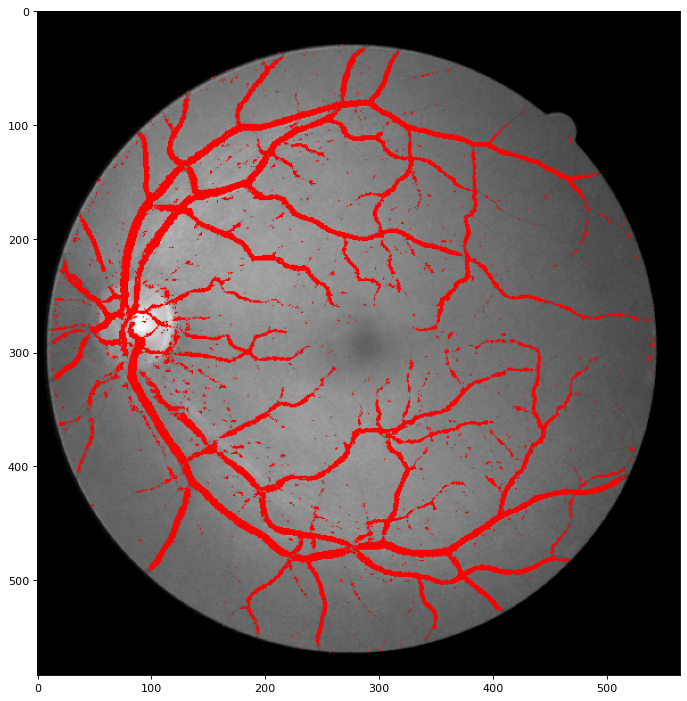

Accuracy score: 0.9336988802435153

F1 score: 0.7316145782277157

Confusion matrix:

     t/p      0     1 
        0 1149213 38332 
        1 52017 123145 
Sensivity: 0.7030349048309564
Specificity: 0.9677216442324291


(0.934, 0.732, 1149213, 38332, 52017, 123145)

In [10]:
import pickle
from os import listdir

PATH = r'/home/fer/Drive/Estudios/Master-IA/TFM/dataset/DRIVE/training/images'
MASK_PATH = r'/home/fer/Drive/Estudios/Master-IA/TFM/dataset/DRIVE/training/mask'
LABELS_PATH = r'/home/fer/Drive/Estudios/Master-IA/TFM/dataset/DRIVE/training/1st_manual'

def load_images():
    paths = [f"{PATH}/{path}" for path in sorted(listdir(PATH))][:14]
    return [np.asarray(Image.open(path).convert('RGB'))[:, :, 1] for path in paths]

def load_masks():
    paths = [f"{MASK_PATH}/{path}" for path in sorted(listdir(MASK_PATH))][:14]
    return [np.asarray(Image.open(path).convert('L')) > 100 for path in paths]

IMAGES = load_images()
MASKS = load_masks()

with open(r'/home/fer/Drive/Estudios/Master-IA/TFM/lbp-pyramid/convolution/outputs/16506693338675942_200_iterations/population.pkl', 'rb') as f:
    kernels = pickle.load(f)
    
population, fitness = kernels['population'], kernels['fitness']
individual = population[np.argmax(fitness), :]
n_kernels = 6
k_size = (3, 5, 7)

features = [pd.DataFrame()]*14
count = 0
for j, ks in enumerate(k_size):
    k_len = int(ks**2)
    features = [
        pd.concat([feat_df, pd.DataFrame(np.array(
            [cv2.filter2D(img, -1, individual[(count + i*k_len):(count + (i + 1) * k_len)].reshape((ks, ks)))[mask]
             for i in range(n_kernels // len(k_size))]
        ).T, columns=np.arange(j * (n_kernels // len(k_size)), (j + 1) * (n_kernels // len(k_size))))], axis=1)
        for img, mask, feat_df in zip(IMAGES, MASKS, features)
    ]
    count += k_len * (n_kernels // len(k_size))
    
conv_features = pd.concat(features, ignore_index=True)

def load_images_test():
    paths = [f"{PATH}/{path}" for path in sorted(listdir(PATH))][14:]
    return [np.asarray(Image.open(path).convert('RGB'))[:, :, 1] for path in paths]

def load_masks_test():
    paths = [f"{MASK_PATH}/{path}" for path in sorted(listdir(MASK_PATH))][14:]
    return [np.asarray(Image.open(path).convert('L')) > 100 for path in paths]

IMAGES_test = load_images_test()
MASKS_test = load_masks_test()

features_test = [pd.DataFrame()]*14
count = 0
for j, ks in enumerate(k_size):
    k_len = int(ks**2)
    features_test = [
        pd.concat([feat_df, pd.DataFrame(np.array(
            [cv2.filter2D(img, -1, individual[(count + i*k_len):(count + (i + 1) * k_len)].reshape((ks, ks)))[mask]
             for i in range(n_kernels // len(k_size))]
        ).T, columns=np.arange(j * (n_kernels // len(k_size)), (j + 1) * (n_kernels // len(k_size))))], axis=1)
        for img, mask, feat_df in zip(IMAGES_test, MASKS_test, features_test)
    ]
    count += k_len * (n_kernels // len(k_size))
    
conv_features_test = pd.concat(features_test, ignore_index=True)

extra_features = {'train': conv_features, 'test': conv_features_test}


from main import get_channel_features, get_labels
import pandas as pd

temp_train, temp_test = get_channel_features('../', lbp_version=['riu', 'var'], channels=(1, 2))
conv_features.index = temp_train.index
conv_features_test.index = temp_test.index
df_train.index = temp_train.index
df_test.index = temp_test.index
y_train, y_test = get_labels('../')

features = {
    'x_train': pd.concat([df_train, conv_features], axis=1),
    'x_test': pd.concat([df_test, conv_features_test], axis=1),
    'y_train': y_train,
    'y_test': y_test
}

main(lgb='Num', features=features, plot_once=True, recurrence=False)

/home/fer/anaconda3/envs/TFM/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


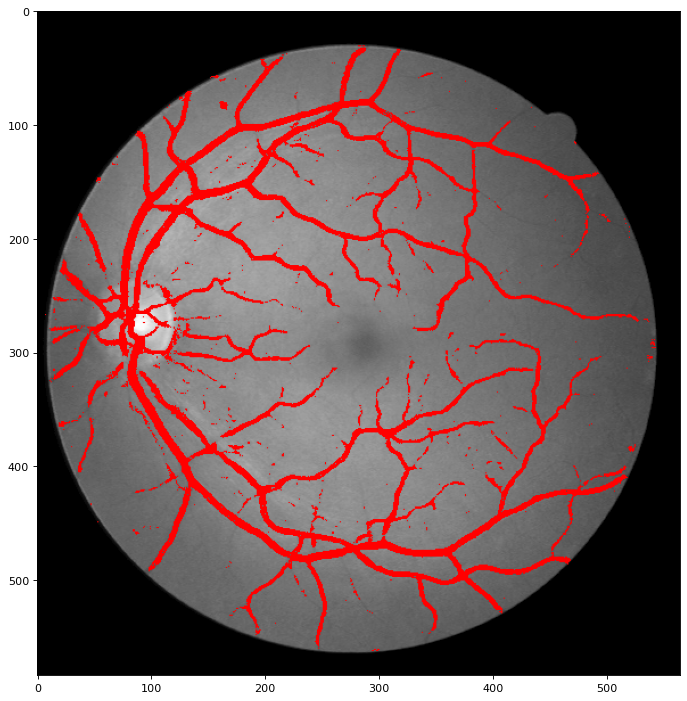

In [ ]:
main(lgb='Num', features=features, plot_once=True, recurrence=True)

## Grid search

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, KFold
from main import LGBMNumerical, lgb_f1_score

np.random.seed(1)

gkf = KFold(n_splits=5, shuffle=True, random_state=42).split(X=features['x_train'], y=features['y_train'])

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 15, 30],
    'learning_rate': [0.01, 0.1, 0.5],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5],
    'num_leaves': [30, 50, 70]
}

lgb_estimator = LGBMNumerical(
    num_leaves=50,
    max_depth=30,
    random_state=42,
    verbose=0,
    # metric='None',
    n_jobs=8,
    # n_estimators=1000,
    colsample_bytree=0.9,
    subsample=0.7,
    learning_rate=0.5,
    force_row_wise=True
)

gsearch = GridSearchCV(estimator=lgb_estimator, param_grid=param_grid, cv=gkf)
lgb_model = gsearch.fit(X=features['x_train'], y=features['y_train'])

print(lgb_model.best_params_, lgb_model.best_score_)

In [ ]:
lgb_estimator_2 = LGBMNumerical(
    num_leaves=30,
    max_depth=5,
    random_state=42,
    verbose=0,
    # metric='None',
    n_jobs=8,
    n_estimators=150,
    colsample_bytree=0.9,
    subsample=0.7,
    learning_rate=0.5,
    reg_alpha=0.5,
    reg_lambda=0.5,
    force_row_wise=True
)
lgb_estimator_2.fit(x=features['x_train'], y=features['y_train'])
y_pred = lgb_estimator_2.predict(features['x_test'])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

print(f1_score(features['y_test'], y_pred))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from confusion_matrix_pretty_print import print_confusion_matrix
y_predicted = y_pred
y_test = features['y_test']
acc = accuracy_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted)
mat = confusion_matrix(y_test, y_predicted).ravel()
print('Accuracy score: ' + str(acc) + '\n')
print('F1 score: ' + str(f1) + '\n')
print('Confusion matrix:\n')
print_confusion_matrix(y_test, y_predicted)
print(f'Sensivity: {int(mat[3]) / (int(mat[3]) + int(mat[2]))}')
print(f'Specificity: {int(mat[0]) / (int(mat[0]) + int(mat[1]))}')